In [67]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np



In [ ]:
# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
#df

In [68]:
pd.reset_option('display.max_rows')

In [70]:
len(df)

891

In [71]:
df.Age.count()

714

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [23]:
df.Survived.nunique()

2

In [24]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df_n=df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


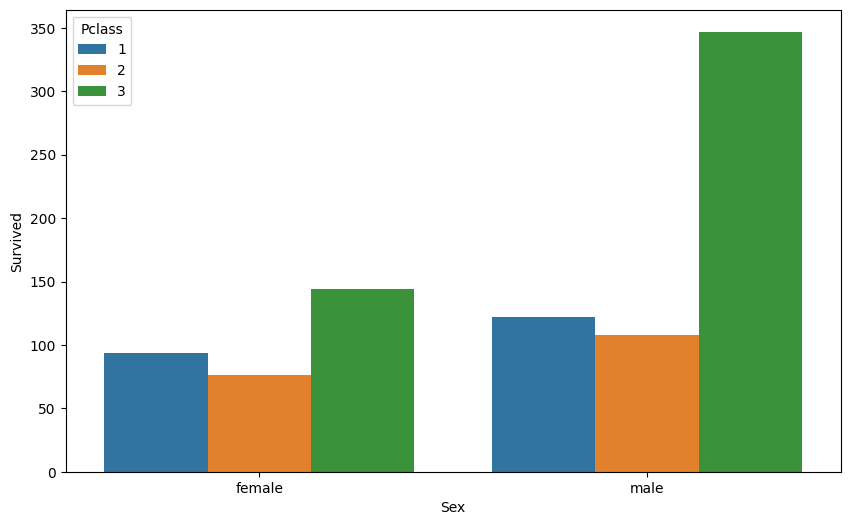

In [27]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df_n);

In [28]:
df_x=df[['Survived','Pclass']].groupby(by=['Pclass']).count().reset_index()
df_x['Pclass']=df_x['Pclass'].astype('str')
df_x.head()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [44]:
from bokeh.palettes import Spectral6
from bokeh.io import show, output_notebook
from bokeh.models import HoverTool, CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from bokeh.plotting import figure

source = ColumnDataSource(data=dict(Pclass=df_x.Pclass, counts=df_x.Survived, color=Spectral6))
p = figure(x_range=df_x.Pclass, height=250, title="Clases involucradas")
p.vbar(x='Pclass', top='counts', width=0.9, color='color', source=source)
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Clase"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.add_tools(HoverTool())
output_notebook()


# Especificar el archivo de salida
output_file("grafico.html")


show(p)

Loading BokehJS ...

<Axes: xlabel='Fare', ylabel='Count'>

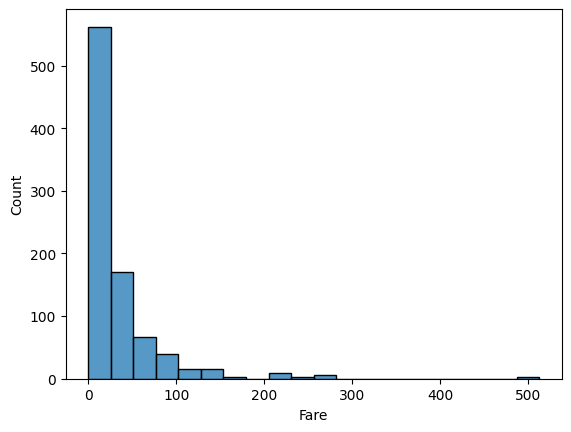

In [34]:
sns.histplot(data=df, x="Fare",bins=20)

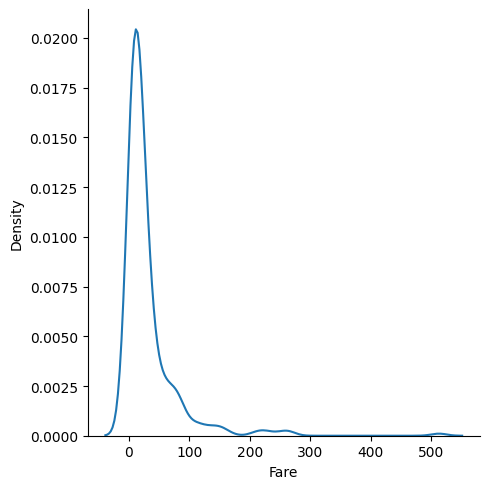

In [35]:
#sns.displot(data=df, x="Fare",bins=20)
sns.displot(data=df, x="Fare",kind="kde") #curvas de densidad

<Axes: xlabel='Age', ylabel='Count'>

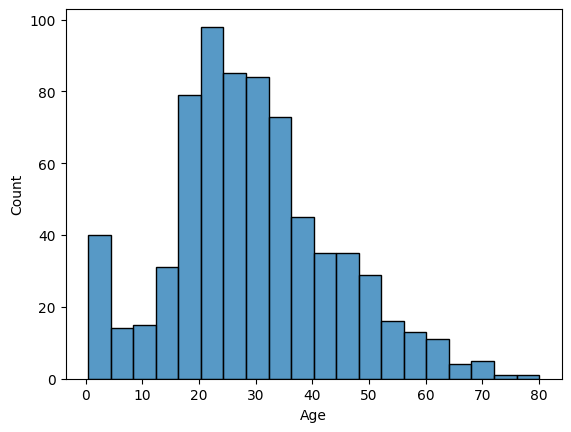

In [36]:
sns.histplot(data=df, x="Age",bins=20)

<Axes: >

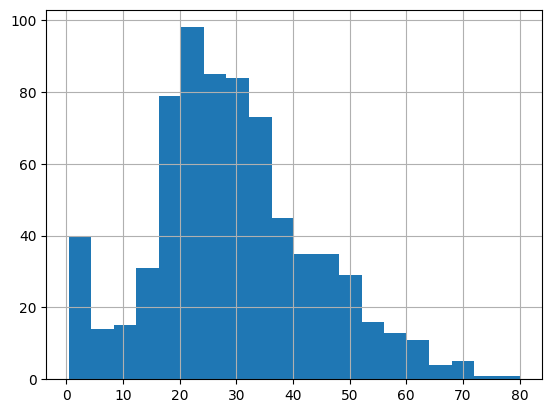

In [37]:
# Crear un histograma con pandas es posible
#df.hist(column='Age', bins=20)
df["Age"].hist(bins=20)

In [43]:
# hacer un histograma con las edades, pero que no se tengan NaN


data = df.Age.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(height=300,width=500, title='Histograma de edades')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white") #los arrays edges se utilizan para especificar los bordes izquierdo y derecho de las barras del histograma.
# Crear el histograma en la orientación vertical
#p.quad( right=hist, left=0, bottom=edges[:-1], top=edges[1:], line_color="white")

p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool()) #se utiliza en Bokeh para agregar herramientas interactivas a una figura
#output_file("hist.html")
show(p)

In [46]:
data = df.Age.values
print (len(data[np.isnan(data)])) #muestra el total de valores faltantes
print (len(data[~np.isnan(data)])) # muestra el total de valores no faltantes


177
177


In [47]:
len(hist)

20

In [48]:
edges[:-1]

array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
       32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
       64.084, 68.063, 72.042, 76.021])

In [49]:
edges[1:]

array([ 4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273, 32.252,
       36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105, 64.084,
       68.063, 72.042, 76.021, 80.   ])

In [50]:

arreglo= np.array([2,3,np.nan])
df_2=pd.DataFrame(arreglo, columns=["ejemplo"])
df_2

,ejemplo
0,2.0
1,3.0
2,NaN


In [51]:

df_2[~np.isnan(df_2.ejemplo)]

,ejemplo
0,2.0
1,3.0


In [52]:

df_2[~np.isnan(df_2.ejemplo)]


,ejemplo
0,2.0
1,3.0


In [54]:
data = df.Fare.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(height=300, width=500, title='Histograma de tarifas')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Tarifa (USD)"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

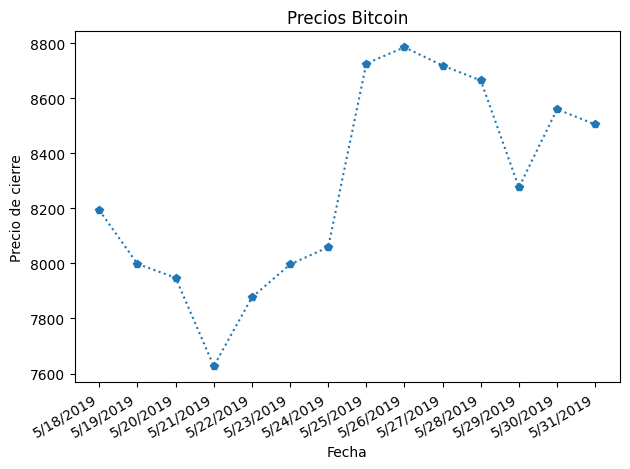

In [56]:
data=pd.read_csv('./TimeSeriesData.csv') # Leer el archivo
price_date=data['Date'] # extraer dos vectores uno para la fecha
price_close=data['Close'] # extraer el precio de cierre en vector
plt.plot_date(price_date, price_close, linestyle='dotted',marker='p') # Graficar la serie de tiempo

#revisar los marker en https://matplotlib.org/stable/api/markers_api.html
#linestyle https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Precios Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.tight_layout() # Ajustar los ejes
plt.show() # mostrar la grafica

Text(0, 0.5, 'Precio de apertura')

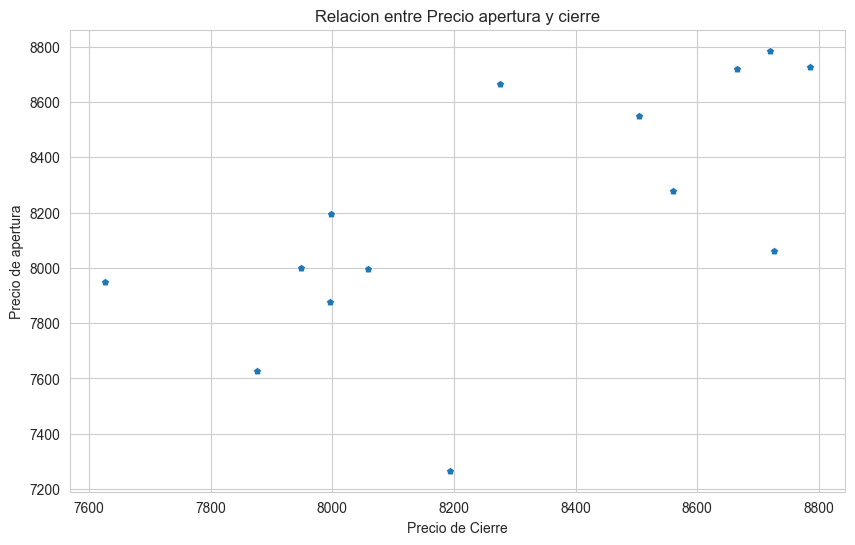

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open, marker='p')
plt.title('Relacion entre Precio apertura y cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

In [58]:
import numpy as np


"""
Un valor de correlación de 0.6 indica que hay una relación moderada entre las dos variables.
Esto significa que cuando una variable aumenta, es probable que la otra variable también aumente,
y cuando una variable disminuye, es probable que la otra variable también disminuya.
Sin embargo, es importante tener en cuenta que la correlación no implica causalidad,
lo que significa que no se puede inferir que una variable causa la otra solo porque están correlacionadas.

Es importante tener en cuenta que el contexto de los datos y el propósito del análisis pueden afectar la
interpretación de la correlación. En algunos casos, una correlación de 0.6 puede considerarse alta y
en otros casos puede considerarse moderada.
Por lo tanto, es importante tomar en cuenta el contexto y el propósito del análisis para interpretar adecuadamente
el valor de correlación.
"""
print(f"El valor de correlación es {np.corrcoef(data.Close, data.Open)[0,1]} \n")
#\n es el carácter de salto de línea
np.corrcoef(data.Close, data.Open)

El valor de correlación es 0.646006168285023 



array([[1.        , 0.64600617],
       [0.64600617, 1.        ]])

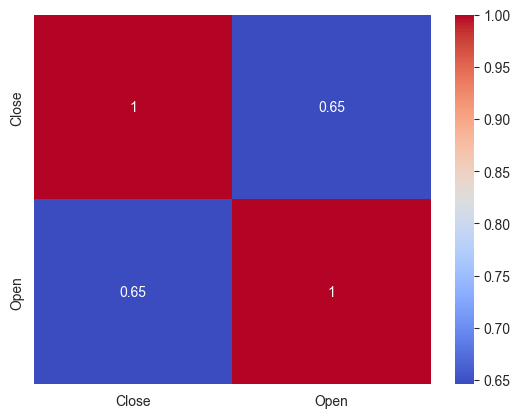

In [59]:
#Veamos una forma más elegante de hacer una matriz de correlación


# Seleccionar las dos columnas que quieres comparar
columnas_seleccionadas = data[['Close', 'Open']]

# Calcular la matriz de correlación
matriz_correlacion = columnas_seleccionadas.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=True)

"""
annot=True: este parámetro establece si deseas mostrar los valores exactos
en la matriz de correlación. Si se establece en True, se mostrarán los valores en cada celda

cmap= es para seleccionar los colores dentro de la matriz, revisar opciones en https://seaborn.pydata.org/tutorial/color_palettes.html
"""

# Mostrar la visualización
plt.show()

In [61]:
# Seleccion de datos
from bokeh.models import Range1d
x_scatter = data.Close # Data en x
y_scatter = data.Open # data en y
# Grafico (Fondo)
scatter_plot = figure(width=700, height=300, x_axis_label='Close', y_axis_label='Open', title='Dispersion Open vs Close')
# Scatter plot
scatter_plot.circle(x_scatter, y_scatter, size=5, line_color='navy', fill_color='orange', fill_alpha=0.5)
# Agregar opcion interactiva
scatter_plot.add_tools(HoverTool())
# Mostrar
scatter_plot.y_range= Range1d(7400, 8800) # Definir limites
show(scatter_plot)

Text(0, 0.5, 'Tarifa')

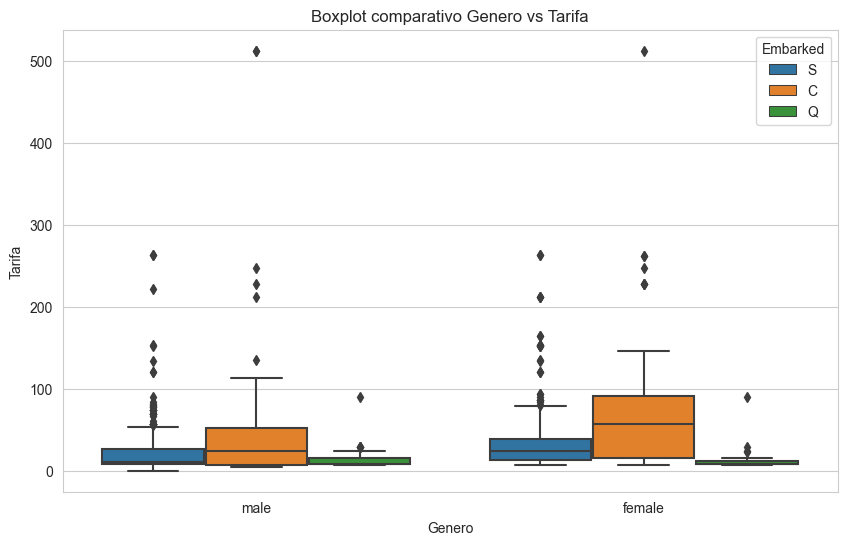

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

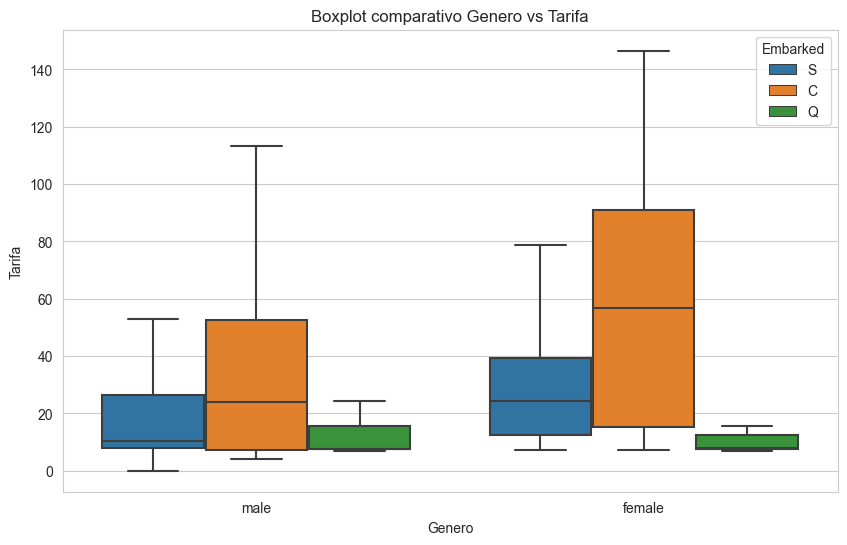

In [63]:
#showfliers=False, No muestra los valores atipicos.
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked,showfliers=False)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

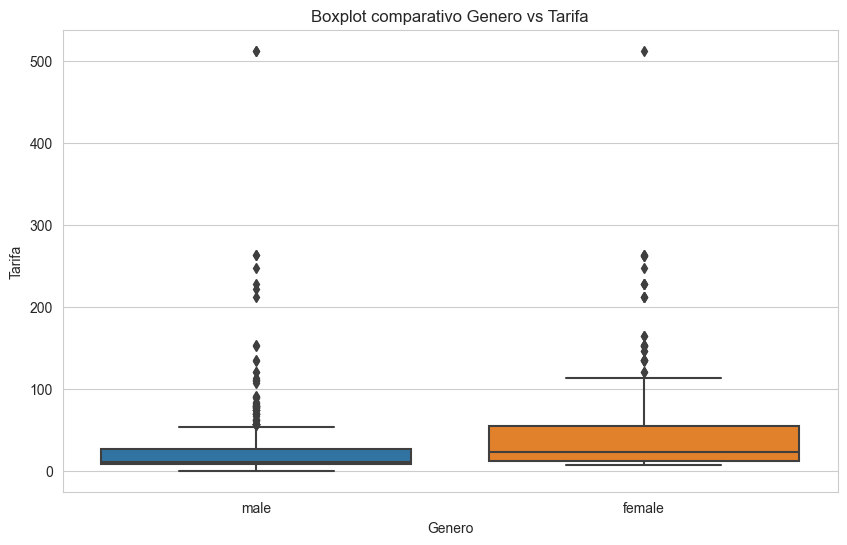

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

In [65]:

# Obtener los valores atípicos (en este ejemplo outliers superiores)
valor_max = df["Fare"].quantile(0.75) + 1.5*(df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25))
valor_max

65.6344

In [66]:
outliers = df["Fare"][df["Fare"]>valor_max]
#len(outliers) versión alternativa para el total de la serie
outliers.count()

116